# Разведочный анализ данных: начало

Мы будем работать с датасетом про алмазы - в нем содержатся их различные характеристики, а также стоимость.

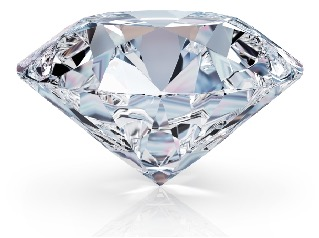

[Интересная статья про качество алмазов](https://www.diamonds.pro/education/diamond-depth-and-table/)

**Цели на сегодня:**

* понять влияние различных характеристик алмазов на их качество и стоимость

* научиться делать разведочный анализ данных

* изучить библиотеки pandas, numpy и matplotlib, seaborn

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import polars as pl
import polars.selectors as cs


In [2]:
DIAMONDS_DATASET = "https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/diamonds_good.csv"

In [3]:
df = pl.read_csv(DIAMONDS_DATASET)

## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [4]:
df.head(10)

shape: (10, 10)
┌───────┬───────────┬───────┬─────────┬───┬───────┬──────┬──────┬──────┐
│ carat ┆ cut       ┆ color ┆ clarity ┆ … ┆ price ┆ 'x'  ┆ 'y'  ┆ 'z'  │
│ ---   ┆ ---       ┆ ---   ┆ ---     ┆   ┆ ---   ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str       ┆ str   ┆ str     ┆   ┆ f64   ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═══════════╪═══════╪═════════╪═══╪═══════╪══════╪══════╪══════╡
│ 0.23  ┆ Ideal     ┆ E     ┆ SI2     ┆ … ┆ 326.0 ┆ 3.95 ┆ 3.98 ┆ 2.43 │
│ 0.21  ┆ Premium   ┆ E     ┆ SI1     ┆ … ┆ 326.0 ┆ 3.89 ┆ 3.84 ┆ 2.31 │
│ 0.23  ┆ Good      ┆ E     ┆ VS1     ┆ … ┆ 327.0 ┆ 4.05 ┆ 4.07 ┆ 2.31 │
│ 0.29  ┆ Premium   ┆ I     ┆ VS2     ┆ … ┆ 334.0 ┆ 4.2  ┆ 4.23 ┆ 2.63 │
│ 0.31  ┆ Good      ┆ J     ┆ SI2     ┆ … ┆ 335.0 ┆ 4.34 ┆ 4.35 ┆ 2.75 │
│ null  ┆ Very Good ┆ J     ┆ VVS2    ┆ … ┆ 336.0 ┆ 3.94 ┆ 3.96 ┆ 2.48 │
│ 0.24  ┆ Very Good ┆ I     ┆ VVS1    ┆ … ┆ 336.0 ┆ 3.95 ┆ 3.98 ┆ 2.47 │
│ 0.26  ┆ Very Good ┆ H     ┆ SI1     ┆ … ┆ 337.0 ┆ 4.07 ┆ 4.11 ┆ 2.53 │
│ 0.22  ┆ Fair      ┆ E     ┆ VS2     ┆ … ┆ 337.0 ┆ 3.87 ┆ 3.78 ┆ 2.49 │
│ 0.23  ┆ Very Good ┆ H     ┆ VS1     ┆ … ┆ 338.0 ┆ 4.0  ┆ 4.05 ┆ 2.39 │
└───────┴───────────┴───────┴─────────┴───┴───────┴──────┴──────┴──────┘

In [5]:
df.tail()

shape: (5, 10)
┌───────┬───────────┬───────┬─────────┬───┬────────┬──────┬──────┬──────┐
│ carat ┆ cut       ┆ color ┆ clarity ┆ … ┆ price  ┆ 'x'  ┆ 'y'  ┆ 'z'  │
│ ---   ┆ ---       ┆ ---   ┆ ---     ┆   ┆ ---    ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str       ┆ str   ┆ str     ┆   ┆ f64    ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═══════════╪═══════╪═════════╪═══╪════════╪══════╪══════╪══════╡
│ 0.72  ┆ Ideal     ┆ D     ┆ SI1     ┆ … ┆ 2757.0 ┆ 5.75 ┆ 5.76 ┆ 3.5  │
│ 0.72  ┆ Good      ┆ D     ┆ SI1     ┆ … ┆ 2757.0 ┆ 5.69 ┆ 5.75 ┆ 3.61 │
│ 0.7   ┆ Very Good ┆ D     ┆ SI1     ┆ … ┆ 2757.0 ┆ 5.66 ┆ 5.68 ┆ 3.56 │
│ 0.86  ┆ Premium   ┆ H     ┆ SI2     ┆ … ┆ 2757.0 ┆ 6.15 ┆ 6.12 ┆ 3.74 │
│ 0.75  ┆ Ideal     ┆ D     ┆ SI2     ┆ … ┆ 2757.0 ┆ 5.83 ┆ 5.87 ┆ 3.64 │
└───────┴───────────┴───────┴─────────┴───┴────────┴──────┴──────┴──────┘

In [6]:
df.sample(3)

shape: (3, 10)
┌───────┬───────────┬───────┬─────────┬───┬────────┬──────┬──────┬──────┐
│ carat ┆ cut       ┆ color ┆ clarity ┆ … ┆ price  ┆ 'x'  ┆ 'y'  ┆ 'z'  │
│ ---   ┆ ---       ┆ ---   ┆ ---     ┆   ┆ ---    ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str       ┆ str   ┆ str     ┆   ┆ f64    ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═══════════╪═══════╪═════════╪═══╪════════╪══════╪══════╪══════╡
│ 0.58  ┆ Good      ┆ G     ┆ VS2     ┆ … ┆ 1287.0 ┆ 5.36 ┆ 5.28 ┆ 3.36 │
│ 1.0   ┆ Fair      ┆ E     ┆ SI2     ┆ … ┆ 2948.0 ┆ 6.28 ┆ 6.16 ┆ 4.09 │
│ 1.08  ┆ Very Good ┆ H     ┆ VS2     ┆ … ┆ 5515.0 ┆ 6.47 ┆ 6.56 ┆ 4.1  │
└───────┴───────────┴───────┴─────────┴───┴────────┴──────┴──────┴──────┘

## Исследование данных

Размер датасета

In [7]:
df.shape

(53940, 10)

Информация о типах данных и пропусках

In [8]:
df.schema

Schema([('carat', Float64),
        ('cut', String),
        ('color', String),
        ('clarity', String),
        ('depth', Float64),
        ('table', Float64),
        ('price', Float64),
        ("'x'", Float64),
        ("'y'", Float64),
        ("'z'", Float64)])

Основные числовые характеристики

In [9]:
df.describe()

shape: (9, 11)
┌────────────┬──────────┬───────────┬───────┬───┬─────────────┬──────────┬──────────┬──────────┐
│ statistic  ┆ carat    ┆ cut       ┆ color ┆ … ┆ price       ┆ 'x'      ┆ 'y'      ┆ 'z'      │
│ ---        ┆ ---      ┆ ---       ┆ ---   ┆   ┆ ---         ┆ ---      ┆ ---      ┆ ---      │
│ str        ┆ f64      ┆ str       ┆ str   ┆   ┆ f64         ┆ f64      ┆ f64      ┆ f64      │
╞════════════╪══════════╪═══════════╪═══════╪═══╪═════════════╪══════════╪══════════╪══════════╡
│ count      ┆ 53442.0  ┆ 53940     ┆ 53940 ┆ … ┆ 53940.0     ┆ 53940.0  ┆ 53935.0  ┆ 53940.0  │
│ null_count ┆ 498.0    ┆ 0         ┆ 0     ┆ … ┆ 0.0         ┆ 0.0      ┆ 5.0      ┆ 0.0      │
│ mean       ┆ 0.797561 ┆ null      ┆ null  ┆ … ┆ 3932.799722 ┆ 5.731157 ┆ 5.734469 ┆ 3.538734 │
│ std        ┆ 0.473534 ┆ null      ┆ null  ┆ … ┆ 3989.439738 ┆ 1.121761 ┆ 1.142125 ┆ 0.705699 │
│ min        ┆ 0.2      ┆ Fair      ┆ D     ┆ … ┆ 326.0       ┆ 0.0      ┆ 0.0      ┆ 0.0      │
│ 25%        ┆ 0.4      ┆ null      ┆ null  ┆ … ┆ 950.0       ┆ 4.71     ┆ 4.72     ┆ 2.91     │
│ 50%        ┆ 0.7      ┆ null      ┆ null  ┆ … ┆ 2401.0      ┆ 5.7      ┆ 5.71     ┆ 3.53     │
│ 75%        ┆ 1.04     ┆ null      ┆ null  ┆ … ┆ 5324.0      ┆ 6.54     ┆ 6.54     ┆ 4.04     │
│ max        ┆ 5.01     ┆ Very Good ┆ J     ┆ … ┆ 18823.0     ┆ 10.74    ┆ 58.9     ┆ 31.8     │
└────────────┴──────────┴───────────┴───────┴───┴─────────────┴──────────┴──────────┴──────────┘

In [10]:
# df.describe(include='object')

In [11]:
df.is_duplicated().sum()


267

In [12]:
# df = df.drop_duplicates()

df = df.unique()

df.shape

(53805, 10)

In [13]:

df.head()

shape: (5, 10)
┌───────┬─────────┬───────┬─────────┬───┬────────┬──────┬──────┬──────┐
│ carat ┆ cut     ┆ color ┆ clarity ┆ … ┆ price  ┆ 'x'  ┆ 'y'  ┆ 'z'  │
│ ---   ┆ ---     ┆ ---   ┆ ---     ┆   ┆ ---    ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str     ┆ str   ┆ str     ┆   ┆ f64    ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═════════╪═══════╪═════════╪═══╪════════╪══════╪══════╪══════╡
│ 0.72  ┆ Premium ┆ H     ┆ SI1     ┆ … ┆ 2398.0 ┆ 5.8  ┆ 5.77 ┆ 3.56 │
│ 0.35  ┆ Ideal   ┆ D     ┆ VS2     ┆ … ┆ 1063.0 ┆ 4.55 ┆ 4.53 ┆ 2.79 │
│ 0.31  ┆ Ideal   ┆ F     ┆ VS2     ┆ … ┆ 749.0  ┆ 4.39 ┆ 4.35 ┆ 2.69 │
│ 0.41  ┆ Ideal   ┆ G     ┆ VVS2    ┆ … ┆ 1076.0 ┆ 4.74 ┆ 4.7  ┆ 2.97 │
│ 0.36  ┆ Ideal   ┆ F     ┆ SI1     ┆ … ┆ 644.0  ┆ 4.69 ┆ 4.72 ┆ 2.81 │
└───────┴─────────┴───────┴─────────┴───┴────────┴──────┴──────┴──────┘

## Работа с пропущенными значениями

Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить или заполнить средним/медианой

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

In [14]:
(df.null_count() / len(df) * 100)

shape: (1, 10)
┌──────────┬─────┬───────┬─────────┬───┬───────┬─────┬──────────┬─────┐
│ carat    ┆ cut ┆ color ┆ clarity ┆ … ┆ price ┆ 'x' ┆ 'y'      ┆ 'z' │
│ ---      ┆ --- ┆ ---   ┆ ---     ┆   ┆ ---   ┆ --- ┆ ---      ┆ --- │
│ f64      ┆ f64 ┆ f64   ┆ f64     ┆   ┆ f64   ┆ f64 ┆ f64      ┆ f64 │
╞══════════╪═════╪═══════╪═════════╪═══╪═══════╪═════╪══════════╪═════╡
│ 0.925565 ┆ 0.0 ┆ 0.0   ┆ 0.0     ┆ … ┆ 0.0   ┆ 0.0 ┆ 0.009293 ┆ 0.0 │
└──────────┴─────┴───────┴─────────┴───┴───────┴─────┴──────────┴─────┘

In [15]:
df2 = df.to_pandas()

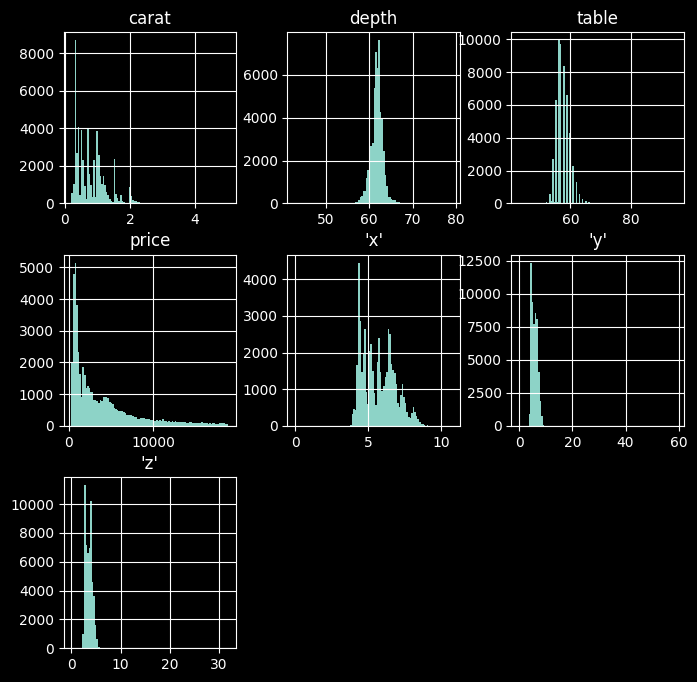

In [16]:
df2.hist(bins=100, figsize=(8,8));

In [17]:
median_carat = df['carat'].median()


In [18]:
median_carat

0.7

In [19]:
# Calculate median
median_carat = df.select(pl.col("carat").median()).item()

# Fill null values


In [20]:
df = df.with_columns(
    pl.col("carat").fill_null(median_carat)
)

In [21]:
median_depth = df.select(pl.col("depth").median()).item()

df = df.with_columns(
    pl.col("depth").fill_null(median_depth)
)

In [22]:
df.head()

shape: (5, 10)
┌───────┬─────────┬───────┬─────────┬───┬────────┬──────┬──────┬──────┐
│ carat ┆ cut     ┆ color ┆ clarity ┆ … ┆ price  ┆ 'x'  ┆ 'y'  ┆ 'z'  │
│ ---   ┆ ---     ┆ ---   ┆ ---     ┆   ┆ ---    ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str     ┆ str   ┆ str     ┆   ┆ f64    ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═════════╪═══════╪═════════╪═══╪════════╪══════╪══════╪══════╡
│ 0.72  ┆ Premium ┆ H     ┆ SI1     ┆ … ┆ 2398.0 ┆ 5.8  ┆ 5.77 ┆ 3.56 │
│ 0.35  ┆ Ideal   ┆ D     ┆ VS2     ┆ … ┆ 1063.0 ┆ 4.55 ┆ 4.53 ┆ 2.79 │
│ 0.31  ┆ Ideal   ┆ F     ┆ VS2     ┆ … ┆ 749.0  ┆ 4.39 ┆ 4.35 ┆ 2.69 │
│ 0.41  ┆ Ideal   ┆ G     ┆ VVS2    ┆ … ┆ 1076.0 ┆ 4.74 ┆ 4.7  ┆ 2.97 │
│ 0.36  ┆ Ideal   ┆ F     ┆ SI1     ┆ … ┆ 644.0  ┆ 4.69 ┆ 4.72 ┆ 2.81 │
└───────┴─────────┴───────┴─────────┴───┴────────┴──────┴──────┴──────┘

### Задание 1

Заполните пропуски в столбце `y` медианным значением. Чему равно это значение? Ответ округлите до сотых.

In [23]:
print(df.columns)

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', "'x'", "'y'", "'z'"]


In [24]:
y = df.select(pl.col("'y'").median())

In [25]:
df = df.with_columns(pl.col("'y'").fill_null(y) ) # import time)

## Однофакторный анализ

### Число карат

* мелкие — массой до 0,30 карат (не включительно);
* средние — массой от 0,30 до 1 карат (не включительно);
* крупные – 1 карат и выше, называют солитеры.


Небольшие бриллианты различного размера, полученные при огранке алмаза, и весящие каждый в отдельности менее 0,25 карат, называют *melee (мили)*. Полученные таким же путем более крупные бриллианты различного размера называют *melange (меланж)*.


Бриллианты более 6 карат обычно продаются c аукционов.


Алмазам и бриллиантам более 25 карат присваивают собственные имена.

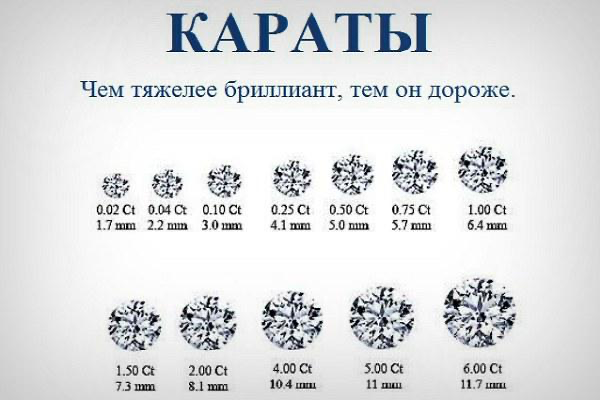

In [26]:
df2 = df.to_pandas()

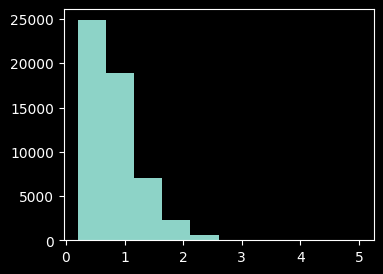

In [27]:
plt.figure(figsize=(4,3))

plt.hist(df2.carat);

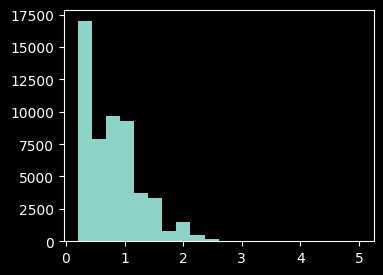

In [28]:
plt.figure(figsize=(4,3))

plt.hist(df2.carat, bins=20);

Сколько карат весит самый тяжелый бриллиант в датасете? А самый легкий?

In [29]:
df.select(pl.col("carat").min())


shape: (1, 1)
┌───────┐
│ carat │
│ ---   │
│ f64   │
╞═══════╡
│ 0.2   │
└───────┘

In [30]:
df.select(pl.col("carat").max())

shape: (1, 1)
┌───────┐
│ carat │
│ ---   │
│ f64   │
╞═══════╡
│ 5.01  │
└───────┘

Сколько мелких бриллиантов в датасете?

In [31]:
df.filter(pl.col("carat") < 0.3).select(pl.col("carat").len())

shape: (1, 1)
┌───────┐
│ carat │
│ ---   │
│ u32   │
╞═══════╡
│ 1582  │
└───────┘

Сколько процентов бриллиантов среди всего датасета - крупные?

In [32]:
100 * len(df2[df2.carat >= 1]) / len(df)

35.00046464083264

In [33]:
df.filter(pl.col("carat") >= 1).select(pl.col("carat").len()) / len(df)

shape: (1, 1)
┌──────────┐
│ carat    │
│ ---      │
│ f64      │
╞══════════╡
│ 0.350005 │
└──────────┘

Посмотрим как число карат влияет на стоимость алмаза

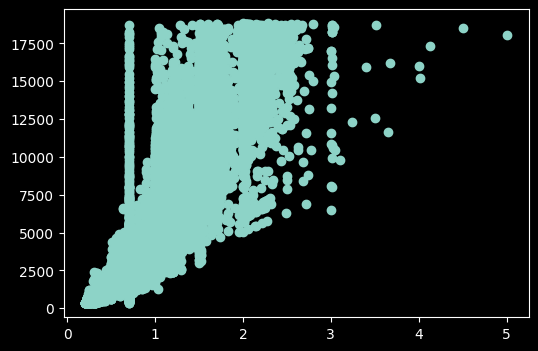

In [34]:
plt.figure(figsize=(6,4))

plt.scatter(df2.carat, df2.price);

In [35]:
df.select(pl.corr('carat', 'price')).item()

0.9164989435440218

### Cut (огранка алмаза)

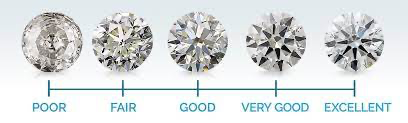

In [36]:
df2['cut'].value_counts(normalize=True)

cut
Ideal        0.398941
Premium      0.255088
Very Good    0.224013
Good         0.090772
Fair         0.029700
Goood        0.001487
Name: proportion, dtype: float64

In [37]:
df2['cut'] = df2['cut'].replace('Goood', 'Good')

Посмотрим как влияет огранка алмаза на его стоимость

In [38]:
import plotly.express as px

# Calculate mean price for each cut category
df_grouped = df.group_by('cut').agg(
    pl.col('price').mean()
).sort('price')

# Create barplot
fig = px.bar(
    df_grouped,
    x='cut',
    y='price',
    color='cut',
    title='Cut - Price',
    width=600,
    height=400,
    color_discrete_sequence=px.colors.sequential.Viridis
    
)

# Update layout
fig.update_layout(
    showlegend=False,
    title_x=0.5
)

fig.show()

In [39]:
df.head()

shape: (5, 10)
┌───────┬─────────┬───────┬─────────┬───┬────────┬──────┬──────┬──────┐
│ carat ┆ cut     ┆ color ┆ clarity ┆ … ┆ price  ┆ 'x'  ┆ 'y'  ┆ 'z'  │
│ ---   ┆ ---     ┆ ---   ┆ ---     ┆   ┆ ---    ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str     ┆ str   ┆ str     ┆   ┆ f64    ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═════════╪═══════╪═════════╪═══╪════════╪══════╪══════╪══════╡
│ 0.72  ┆ Premium ┆ H     ┆ SI1     ┆ … ┆ 2398.0 ┆ 5.8  ┆ 5.77 ┆ 3.56 │
│ 0.35  ┆ Ideal   ┆ D     ┆ VS2     ┆ … ┆ 1063.0 ┆ 4.55 ┆ 4.53 ┆ 2.79 │
│ 0.31  ┆ Ideal   ┆ F     ┆ VS2     ┆ … ┆ 749.0  ┆ 4.39 ┆ 4.35 ┆ 2.69 │
│ 0.41  ┆ Ideal   ┆ G     ┆ VVS2    ┆ … ┆ 1076.0 ┆ 4.74 ┆ 4.7  ┆ 2.97 │
│ 0.36  ┆ Ideal   ┆ F     ┆ SI1     ┆ … ┆ 644.0  ┆ 4.69 ┆ 4.72 ┆ 2.81 │
└───────┴─────────┴───────┴─────────┴───┴────────┴──────┴──────┴──────┘

### Задание 2

Какое максимальное число карат весит алмаз огранки `Fair`?
Ответ округлите до сотых.

In [40]:
df.filter(pl.col("cut") == "Fair").select(pl.col("carat").max())

shape: (1, 1)
┌───────┐
│ carat │
│ ---   │
│ f64   │
╞═══════╡
│ 5.01  │
└───────┘

Посчитаем среднюю стоимость алмазов в каждой категории

In [41]:
df2.groupby('cut')['price'].mean()

cut
Fair         4347.735294
Good         3926.266317
Ideal        3462.593850
Premium      4581.864918
Very Good    3982.162781
Name: price, dtype: float64

Посчитаем несколько характеристик в зависимости от огранки

In [42]:
df2.groupby('cut').agg(PriceMean=('price','mean'),
                      PriceMedian=('price', 'median'),
                      CaratMean=('carat', 'mean'))

PriceMean  PriceMedian  CaratMean
cut                                           
Fair       4347.735294       3282.0   1.040094
Good       3926.266317       3029.5   0.845796
Ideal      3462.593850       1813.0   0.703331
Premium    4581.864918       3175.0   0.889616
Very Good  3982.162781       2649.0   0.804177

In [43]:
df2.groupby('cut').agg(PriceMean=('price','mean'),
                      PriceMedian=('price', 'median'),
                      CaratMean=('carat', 'mean')).sort_values(by='PriceMean', ascending=False)

PriceMean  PriceMedian  CaratMean
cut                                           
Premium    4581.864918       3175.0   0.889616
Fair       4347.735294       3282.0   1.040094
Very Good  3982.162781       2649.0   0.804177
Good       3926.266317       3029.5   0.845796
Ideal      3462.593850       1813.0   0.703331

## Table and Depth

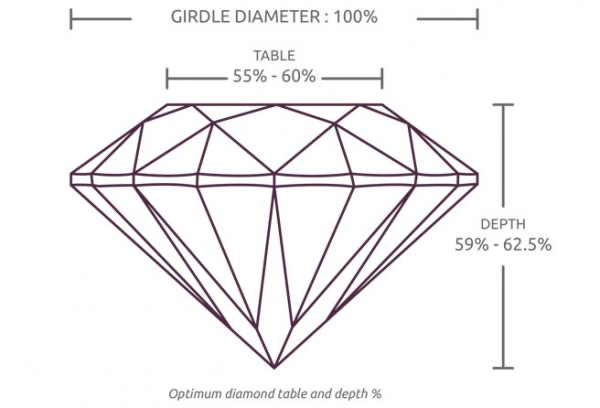

Оптимальное значение параметра `table` для алмаза [55%; 60%].

Какая доля алмазов в данных имеют оптимальное значение `table`?

In [44]:
len(df2[(df2.table >= 55) & (df2.table <= 60)]) / len(df2)

0.8439364371340954

### Задание 3

Оптимальное значение параметра `depth` для алмаза [59%; 62.5%].

Какая доля алмазов в данных имеют одновременно оптимальное значение `table` и `depth`?

Ответ округлите до сотых.

In [45]:
(
    df.filter(
        (pl.col('table').is_between(55, 60)) & 
        (pl.col('depth').is_between(59, 62.5))
    ).height / df.height
)

0.6206300529690549

In [46]:
df.head()

shape: (5, 10)
┌───────┬─────────┬───────┬─────────┬───┬────────┬──────┬──────┬──────┐
│ carat ┆ cut     ┆ color ┆ clarity ┆ … ┆ price  ┆ 'x'  ┆ 'y'  ┆ 'z'  │
│ ---   ┆ ---     ┆ ---   ┆ ---     ┆   ┆ ---    ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str     ┆ str   ┆ str     ┆   ┆ f64    ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═════════╪═══════╪═════════╪═══╪════════╪══════╪══════╪══════╡
│ 0.72  ┆ Premium ┆ H     ┆ SI1     ┆ … ┆ 2398.0 ┆ 5.8  ┆ 5.77 ┆ 3.56 │
│ 0.35  ┆ Ideal   ┆ D     ┆ VS2     ┆ … ┆ 1063.0 ┆ 4.55 ┆ 4.53 ┆ 2.79 │
│ 0.31  ┆ Ideal   ┆ F     ┆ VS2     ┆ … ┆ 749.0  ┆ 4.39 ┆ 4.35 ┆ 2.69 │
│ 0.41  ┆ Ideal   ┆ G     ┆ VVS2    ┆ … ┆ 1076.0 ┆ 4.74 ┆ 4.7  ┆ 2.97 │
│ 0.36  ┆ Ideal   ┆ F     ┆ SI1     ┆ … ┆ 644.0  ┆ 4.69 ┆ 4.72 ┆ 2.81 │
└───────┴─────────┴───────┴─────────┴───┴────────┴──────┴──────┴──────┘

### Задание 4

Сравните медианную стоимость всех алмазов, и алмазов с оптимальными table & depth. Какая больше?

In [47]:
df.select(pl.col('price').median())

shape: (1, 1)
┌────────┐
│ price  │
│ ---    │
│ f64    │
╞════════╡
│ 2401.0 │
└────────┘

In [48]:
(
    df.filter(
        (pl.col('table').is_between(55, 60)) & 
        (pl.col('depth').is_between(59, 62.5))
    ).select(pl.col('price').median())
)

shape: (1, 1)
┌────────┐
│ price  │
│ ---    │
│ f64    │
╞════════╡
│ 2215.0 │
└────────┘

Вычислите корреляцию `table` и `price`, а затем `depth`и `price`. Какой параметр влияет на цену больше?

In [49]:
df.select(pl.corr('table','price')).item()

0.12662153885758196

In [50]:
df.select(pl.corr('depth','price')).item()

-0.010831614226837172

## Clarity - прозрачность алмаза

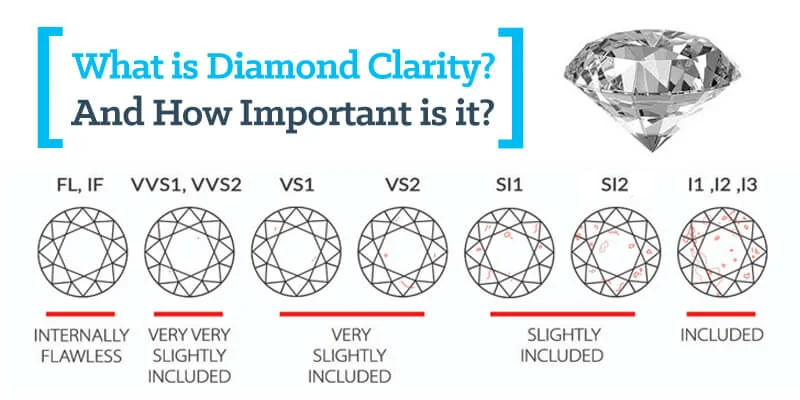

### Задание 5

Сколько различных градаций есть в столбце `clarity`?

In [51]:
n_unique = df.select(pl.col('clarity').n_unique()).item()
# or alternatively
n_unique = df.select(pl.col('clarity').unique().count()).item()

In [52]:
n_unique

8

### Задание 6

Сколько алмазов в таблице, относящихся к категории `very very slightly included`?

In [53]:
# Count VVS1 and VVS2 diamonds (very very slightly included)
count = df.filter(pl.col('clarity').is_in(['VVS1', 'VVS2'])).height

In [54]:
count

8704

### Задание 7

Нарисуйте график зависимости цены алмазов от `clarity`. Алмазы какой категории в наших данных стоят дороже остальных?

In [55]:
import plotly.express as px

# Calculate mean price for each clarity category
df_grouped = df.group_by('clarity').agg(
    pl.col('price').mean()
).sort('price')

# Create bar plot
fig = px.bar(
    df_grouped,
    x='clarity',
    y='price',
    title='Clarity vs Average Price',
    color='clarity',
    width=800,
    height=500
)

# Update layout
fig.update_layout(
    showlegend=False,
    title_x=0.5
)

fig.show()

In [56]:
df.select(pl.col('cut').value_counts())

shape: (6, 1)
┌─────────────────────┐
│ cut                 │
│ ---                 │
│ struct[2]           │
╞═════════════════════╡
│ {"Very Good",12053} │
│ {"Premium",13725}   │
│ {"Goood",80}        │
│ {"Ideal",21465}     │
│ {"Good",4884}       │
│ {"Fair",1598}       │
└─────────────────────┘

In [57]:
df = df.with_columns(
    pl.col('cut').replace('Goood', 'Good')
)

### Задание 8

Для каждой пары значений категорий (`cut`,`clarity`) вычислим среднюю и медианную стоимость. Результат отсортируем по убыванию средней стоимости.

Алмазы какой огранки (`cut`) в совокупностью с некоторой категорией `clarity` имеют наибольшую среднюю стоимость?

In [58]:
# Group by cut and clarity, calculate mean and median price
(df
    .group_by(['cut', 'clarity'])
    .agg([
        pl.col('price').mean().alias('price_mean'),
        pl.col('price').median().alias('price_median')
    ])
    .sort('price_mean', descending=True)
)



shape: (40, 4)
┌───────────┬─────────┬─────────────┬──────────────┐
│ cut       ┆ clarity ┆ price_mean  ┆ price_median │
│ ---       ┆ ---     ┆ ---         ┆ ---          │
│ str       ┆ str     ┆ f64         ┆ f64          │
╞═══════════╪═════════╪═════════════╪══════════════╡
│ Premium   ┆ SI2     ┆ 5556.262491 ┆ 4292.5       │
│ Fair      ┆ SI2     ┆ 5145.740175 ┆ 3681.0       │
│ Very Good ┆ SI2     ┆ 4988.709447 ┆ 4042.0       │
│ Ideal     ┆ SI2     ┆ 4761.711917 ┆ 4068.0       │
│ Good      ┆ SI2     ┆ 4544.119816 ┆ 3763.0       │
│ …         ┆ …       ┆ …           ┆ …            │
│ Ideal     ┆ VVS1    ┆ 2474.09024  ┆ 1114.0       │
│ Very Good ┆ VVS1    ┆ 2451.883249 ┆ 941.0        │
│ Ideal     ┆ IF      ┆ 2279.618257 ┆ 1020.0       │
│ Good      ┆ VVS1    ┆ 2272.391534 ┆ 977.0        │
│ Fair      ┆ IF      ┆ 1912.333333 ┆ 1849.0       │
└───────────┴─────────┴─────────────┴──────────────┘

## Pandas profiling

In [59]:
# !pip install ydata_profiling
# %pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

In [60]:
from ydata_profiling import ProfileReport

In [61]:
df_copy = pd.read_csv(DIAMONDS_DATASET)

profile_report = ProfileReport(df_copy, title='Pandas Profiling Report')

In [62]:
# profile_report

In [63]:
# profile_report.to_file('Diamonds_report.html')

# Домашнее задание

## 1) x, y, z

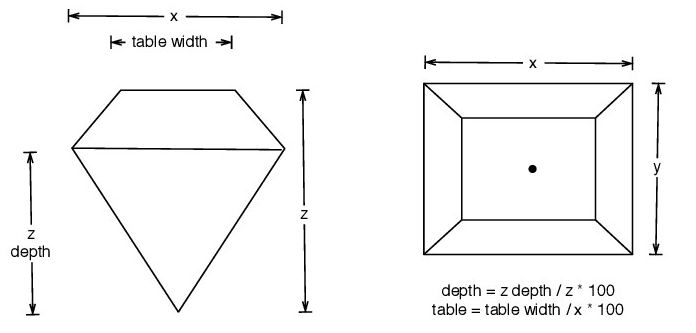

In [64]:
df.columns

['carat',
 'cut',
 'color',
 'clarity',
 'depth',
 'table',
 'price',
 "'x'",
 "'y'",
 "'z'"]

Переименуем колонки

In [65]:
df = df.rename({"'x'" : 'x', "'y'" : 'y', "'z'" : 'z'})

### Задание 1

Для каждого из трех столбцов (`x`, `y`, `z`) вычислите медианное значение. В ответ запишите максимальное из полученных чисел без округлений.

In [66]:
df.select(pl.col('x').median()).item()

5.7

In [67]:
max([df.select(pl.col('x').median()).item(),
df.select(pl.col('y').median()).item(),
df.select(pl.col('z').median()).item()
])

5.71

In [68]:
pl.max_horizontal([
    df.select(pl.col('x').median()).item(),
    df.select(pl.col('y').median()).item(), 
    df.select(pl.col('z').median()).item()
])

<Expr ['dyn float: 5.7.max_horizontal(…'] at 0x720042F234A0>

Для каждого из этих столбцов вычислите минимальное значение.

In [69]:
df.select(pl.col('x').min()), df.select(pl.col('y').min()), df.select(pl.col('z').min())


(shape: (1, 1)
 ┌─────┐
 │ x   │
 │ --- │
 │ f64 │
 ╞═════╡
 │ 0.0 │
 └─────┘,
 shape: (1, 1)
 ┌─────┐
 │ y   │
 │ --- │
 │ f64 │
 ╞═════╡
 │ 0.0 │
 └─────┘,
 shape: (1, 1)
 ┌─────┐
 │ z   │
 │ --- │
 │ f64 │
 ╞═════╡
 │ 0.0 │
 └─────┘)

Нулевые размеры - явно ошибки.

### Задание 2

Выведите на экран все строки таблицы (только столбцы `x`,`y`,`z`), в которых хотя бы одна из координат равна нулю.

Сколько таких строк?

In [70]:
df.select(pl.col(['x', 'y', 'z'])).filter((pl.col('x') == 0) | (pl.col('y') == 0) | (pl.col('z') == 0))
...

shape: (19, 3)
┌──────┬──────┬─────┐
│ x    ┆ y    ┆ z   │
│ ---  ┆ ---  ┆ --- │
│ f64  ┆ f64  ┆ f64 │
╞══════╪══════╪═════╡
│ 6.55 ┆ 6.48 ┆ 0.0 │
│ 8.9  ┆ 8.85 ┆ 0.0 │
│ 0.0  ┆ 0.0  ┆ 0.0 │
│ 6.5  ┆ 6.47 ┆ 0.0 │
│ 6.71 ┆ 6.67 ┆ 0.0 │
│ …    ┆ …    ┆ …   │
│ 8.52 ┆ 8.42 ┆ 0.0 │
│ 6.66 ┆ 6.6  ┆ 0.0 │
│ 0.0  ┆ 6.62 ┆ 0.0 │
│ 8.02 ┆ 7.95 ┆ 0.0 │
│ 0.0  ┆ 0.0  ┆ 0.0 │
└──────┴──────┴─────┘

### Задание 3

Удалите из таблицы эти строки. Сколько строк осталось в таблице?

In [72]:
df = df.filter((pl.col('x') != 0) & (pl.col('y') != 0) & (pl.col('z') != 0))

In [73]:
df

shape: (53_786, 10)
┌───────┬─────────┬───────┬─────────┬───┬────────┬──────┬──────┬──────┐
│ carat ┆ cut     ┆ color ┆ clarity ┆ … ┆ price  ┆ x    ┆ y    ┆ z    │
│ ---   ┆ ---     ┆ ---   ┆ ---     ┆   ┆ ---    ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str     ┆ str   ┆ str     ┆   ┆ f64    ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═════════╪═══════╪═════════╪═══╪════════╪══════╪══════╪══════╡
│ 0.72  ┆ Premium ┆ H     ┆ SI1     ┆ … ┆ 2398.0 ┆ 5.8  ┆ 5.77 ┆ 3.56 │
│ 0.35  ┆ Ideal   ┆ D     ┆ VS2     ┆ … ┆ 1063.0 ┆ 4.55 ┆ 4.53 ┆ 2.79 │
│ 0.31  ┆ Ideal   ┆ F     ┆ VS2     ┆ … ┆ 749.0  ┆ 4.39 ┆ 4.35 ┆ 2.69 │
│ 0.41  ┆ Ideal   ┆ G     ┆ VVS2    ┆ … ┆ 1076.0 ┆ 4.74 ┆ 4.7  ┆ 2.97 │
│ 0.36  ┆ Ideal   ┆ F     ┆ SI1     ┆ … ┆ 644.0  ┆ 4.69 ┆ 4.72 ┆ 2.81 │
│ …     ┆ …       ┆ …     ┆ …       ┆ … ┆ …      ┆ …    ┆ …    ┆ …    │
│ 1.12  ┆ Premium ┆ F     ┆ VS1     ┆ … ┆ 7761.0 ┆ 6.65 ┆ 6.75 ┆ 4.14 │
│ 0.42  ┆ Premium ┆ F     ┆ VVS2    ┆ … ┆ 1142.0 ┆ 4.78 ┆ 4.82 ┆ 2.96 │
│ 0.34  ┆ Ideal   ┆ E     ┆ VVS2    ┆ … ┆ 944.0  ┆ 4.47 ┆ 4.51 ┆ 2.79 │
│ 0.9   ┆ Ideal   ┆ J     ┆ VS1     ┆ … ┆ 3418.0 ┆ 6.16 ┆ 6.18 ┆ 3.83 │
│ 1.19  ┆ Ideal   ┆ D     ┆ SI2     ┆ … ┆ 5406.0 ┆ 6.89 ┆ 6.91 ┆ 4.17 │
└───────┴─────────┴───────┴─────────┴───┴────────┴──────┴──────┴──────┘

### Задание 4

Вычислите корреляцию между каждым из этих столбцов и `price`. Какой столбец коррелирует с ценой алмаза больше всего?

In [76]:
df.select([
        pl.corr('x', 'price').alias('x_correlation'),
        pl.corr('y', 'price').alias('y_correlation'),
        pl.corr('z', 'price').alias('z_correlation')
    ])

shape: (1, 3)
┌───────────────┬───────────────┬───────────────┐
│ x_correlation ┆ y_correlation ┆ z_correlation │
│ ---           ┆ ---           ┆ ---           │
│ f64           ┆ f64           ┆ f64           │
╞═══════════════╪═══════════════╪═══════════════╡
│ 0.887183      ┆ 0.867665      ┆ 0.868089      │
└───────────────┴───────────────┴───────────────┘

### Задание 5

Постройте scatter-plot для отражения зависимости между ценой алмаза и координатой, наиболее с ней коррелирующей. На какую зависимость она больше всего похожа?

In [77]:
import plotly.express as px

# First get correlations to determine which dimension has highest correlation
correlations = df.select([
    pl.corr('x', 'price').alias('x_correlation'),
    pl.corr('y', 'price').alias('y_correlation'),
    pl.corr('z', 'price').alias('z_correlation')
])

# Create scatter plot
fig = px.scatter(df, 
                 x='x',  # Assuming x has highest correlation, adjust if different
                 y='price',
                 title='Diamond Price vs Dimension')
fig.update_layout(
    xaxis_title="Dimension (mm)",
    yaxis_title="Price ($)"
)
fig.show()

### Задание 6

Какой процент среди всех алмазов имеет `x` и `y` размеры, превышающие средние значения (по `x` и `y`)? Ответ округлите до целого числа.

In [ ]:
df.select(
    pl.col('x').mean(),
    pl.col('y').mean(),
    
)

shape: (1, 2)
┌──────────┬──────────┐
│ x        ┆ y        │
│ ---      ┆ ---      │
│ f64      ┆ f64      │
╞══════════╪══════════╡
│ 5.731689 ┆ 5.734953 │
└──────────┴──────────┘

In [94]:
# Calculate means for x and y
means = df.select([
    pl.col('x').mean().alias('x_mean'),
    pl.col('y').mean().alias('y_mean'),
    
])

# Calculate the percentage
(df
    .filter((pl.col('x') > means.select('x_mean').item()) & 
            (pl.col('y') > means.select('y_mean').item()))
    .height / df.height * 100
    )



47.3784999814078

### Задание 7

Какая доля среди крупных алмазов имеет `z`-размеры, меньшие медианного? Ответ округлите до четырех знаков после запятой.

In [85]:
df.head()

shape: (5, 10)
┌───────┬─────────┬───────┬─────────┬───┬────────┬──────┬──────┬──────┐
│ carat ┆ cut     ┆ color ┆ clarity ┆ … ┆ price  ┆ x    ┆ y    ┆ z    │
│ ---   ┆ ---     ┆ ---   ┆ ---     ┆   ┆ ---    ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str     ┆ str   ┆ str     ┆   ┆ f64    ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═════════╪═══════╪═════════╪═══╪════════╪══════╪══════╪══════╡
│ 0.72  ┆ Premium ┆ H     ┆ SI1     ┆ … ┆ 2398.0 ┆ 5.8  ┆ 5.77 ┆ 3.56 │
│ 0.35  ┆ Ideal   ┆ D     ┆ VS2     ┆ … ┆ 1063.0 ┆ 4.55 ┆ 4.53 ┆ 2.79 │
│ 0.31  ┆ Ideal   ┆ F     ┆ VS2     ┆ … ┆ 749.0  ┆ 4.39 ┆ 4.35 ┆ 2.69 │
│ 0.41  ┆ Ideal   ┆ G     ┆ VVS2    ┆ … ┆ 1076.0 ┆ 4.74 ┆ 4.7  ┆ 2.97 │
│ 0.36  ┆ Ideal   ┆ F     ┆ SI1     ┆ … ┆ 644.0  ┆ 4.69 ┆ 4.72 ┆ 2.81 │
└───────┴─────────┴───────┴─────────┴───┴────────┴──────┴──────┴──────┘

In [95]:
means = df.select([
    
    pl.col('z').mean().alias('z_mean')
])

In [97]:
df.filter(pl.col('carat') >= 1).filter(pl.col('z') < means.select('z_mean').item()).height / df.height  * 100

0.007436879485367939

In [98]:
# Calculate median z value for all diamonds
z_median = df.select(pl.col('z').median()).item()

# Get large diamonds (>= 1 carat) with z below median
large_diamonds_below_median = (df
    .filter(pl.col('carat') >= 1)  # filter for large diamonds
    .filter(pl.col('z') < z_median)  # filter for z below median
    .height)  # count rows

# Get total count of large diamonds
total_large_diamonds = df.filter(pl.col('carat') >= 1).height

# Calculate proportion
proportion = round(large_diamonds_below_median / total_large_diamonds, 4)

print(f"Proportion of large diamonds with z below median: {proportion}")

Proportion of large diamonds with z below median: 0.0002


In [ ]:
round(
    df.filter(
        (pl.col("carat") >= 1) & (pl.col("z") < df.select(pl.col("z").median()).item())
    ).height
    / df.filter(pl.col("carat") >= 1).height,
    4,
)

0.0002

## 2) Color

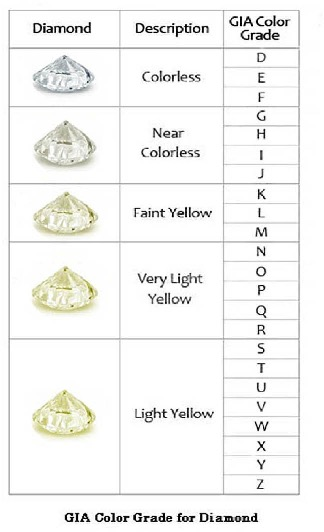

### Задание 8

К каким категориям (Description) из градации выше относятся алмазы в данных?

In [102]:
df.select(pl.col('color').value_counts())

shape: (7, 1)
┌─────────────┐
│ color       │
│ ---         │
│ struct[2]   │
╞═════════════╡
│ {"D",6755}  │
│ {"G",11256} │
│ {"H",8270}  │
│ {"E",9777}  │
│ {"J",2802}  │
│ {"F",9518}  │
│ {"I",5408}  │
└─────────────┘

### Задание 9

Нарисуйте график, отражающий зависимость стоимости алмазов от его категории цвета.

Алмазы какого цвета стоят дороже остальных?

In [103]:

import plotly.express as px

# Calculate average price per color category
fig = px.box(df, 
             x='color', 
             y='price',
             title='Diamond Price Distribution by Color',
             labels={'color': 'Color Grade', 
                    'price': 'Price ($)'})

fig.update_layout(
    xaxis_title="Diamond Color (D is best)",
    yaxis_title="Price ($)")

fig.show()

### Задание 10

Для каждого цвета алмаза вычислите медианную стоимость и медианный вес (в каратах). Отсортируйте полученную при помощи groupby таблицу по убыванию медианной стоимости.

Верно ли, что при убывании PriceMedian, сгруппированной по цвету, CaratMedian также убывает? (не возрастает)

In [110]:
df.group_by('color').agg(
    pl.col('carat').median().alias('carat_mean'),
    pl.col('price').median().alias('price_median')
    
    
).sort('price_median', descending=True)

shape: (7, 3)
┌───────┬────────────┬──────────────┐
│ color ┆ carat_mean ┆ price_median │
│ ---   ┆ ---        ┆ ---          │
│ str   ┆ f64        ┆ f64          │
╞═══════╪════════════╪══════════════╡
│ J     ┆ 1.11       ┆ 4234.5       │
│ I     ┆ 1.0        ┆ 3721.5       │
│ H     ┆ 0.9        ┆ 3449.5       │
│ F     ┆ 0.7        ┆ 2345.0       │
│ G     ┆ 0.7        ┆ 2242.0       │
│ D     ┆ 0.54       ┆ 1842.0       │
│ E     ┆ 0.54       ┆ 1741.0       │
└───────┴────────────┴──────────────┘

### Задание 11

Вычислите среднюю стоимость алмазов по каждой тройке категорий (`cut`,`color`,`clarity`). Какие алмазы дороже остальных?

В ответе запишите тройку названий в скобках через запятую, без кавычек и пробелов. Например, (Premium,D,IF)

In [113]:
# Calculate average price for each combination
result = (df
    .group_by(['cut', 'color', 'clarity'])
    .agg([
        pl.col('price').mean().alias('avg_price')
    ])
    .sort('avg_price', descending=True)
    .head(1)
)

# Format result as (cut,color,clarity)
combination = f"({result.get_column('cut')[0]},{result.get_column('color')[0]},{result.get_column('clarity')[0]})"
print(combination)

(Very Good,D,IF)


In [115]:

 (df
    .group_by(['cut', 'color', 'clarity'])
    .agg([
        pl.col('price').mean().alias('avg_price')
    ])
    .sort('avg_price', descending=True)
    
)


shape: (276, 4)
┌───────────┬───────┬─────────┬──────────────┐
│ cut       ┆ color ┆ clarity ┆ avg_price    │
│ ---       ┆ ---   ┆ ---     ┆ ---          │
│ str       ┆ str   ┆ str     ┆ f64          │
╞═══════════╪═══════╪═════════╪══════════════╡
│ Very Good ┆ D     ┆ IF      ┆ 10298.26087  │
│ Good      ┆ D     ┆ IF      ┆ 10030.333333 │
│ Ideal     ┆ J     ┆ I1      ┆ 9454.0       │
│ Premium   ┆ D     ┆ IF      ┆ 9056.5       │
│ Premium   ┆ J     ┆ SI2     ┆ 7550.285714  │
│ …         ┆ …     ┆ …       ┆ …            │
│ Good      ┆ E     ┆ IF      ┆ 1519.222222  │
│ Ideal     ┆ I     ┆ IF      ┆ 1509.404255  │
│ Fair      ┆ G     ┆ IF      ┆ 1488.0       │
│ Premium   ┆ H     ┆ VVS1    ┆ 1453.758929  │
│ Very Good ┆ J     ┆ IF      ┆ 1074.125     │
└───────────┴───────┴─────────┴──────────────┘